In [157]:
from keras.applications.xception import Xception, decode_predictions, preprocess_input
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv1D, Conv2D
from setEmotions import get_training_data, get_test_data, preprocess_train_images, preprocess_test_images, preprocess_train, preprocess_test, preprocess_validation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [158]:
train = preprocess_train()
validation = preprocess_validation()

#image_batch, label_batch = next(iter(train))

#image_val_batch, label_val_batch = next(iter(validation))

test_gen = preprocess_test()
testX, testY = next(iter(test_gen))

Found 13386 images belonging to 5 classes.
Found 656 images belonging to 5 classes.
Found 528 images belonging to 5 classes.


In [172]:
class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.xcept = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
        self.model = Sequential()
        for layer in self.xcept.layers:
            layer.trainable = False
            self.model.add(layer)
  
        #self.model.add(tf.keras.layers.Conv2D(512, (7,7), activation='relu', padding='same'))
        #self.model.add(tf.keras.layers.Conv2D(32, (7,7), activation='relu', padding='same'))
        #self.model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        #self.model.add(tf.keras.layers.Dropout(0.6))
        self.model.add(tf.keras.layers.Flatten())
        self.model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
        self.model.add(tf.keras.layers.Dropout(0.6))
        self.model.add(tf.keras.layers.Dense(5, activation='softmax'))
        #self.model.summary()
        
        
    def call(self, x):
        x = self.model(x)
        return x
        

In [171]:
model = CNN()
optimizerAdam = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizerAdam,
              metrics=['acc'])

num_of_epochs = 20
batch_size = 8
#train = tf.keras.applications.xception.preprocess_input(train)
history = model.fit(train, validation_data = validation, batch_size=batch_size, epochs=num_of_epochs, shuffle=True)

ValueError: Input 0 of layer conv2d_163 is incompatible with the layer: expected axis -1 of input shape to have value 64 but received input with shape [None, 72, 72, 128]

In [168]:
emotion_label = ["Anger", "Happiness", "Neutral", "Sadness", "Surprise"]
res = model.evaluate(test_gen, batch_size=batch_size)
prediction = model.predict(testX)
#print("Predictions Tabel: ", prediction)

pred = []
for x in prediction:
    x_max = x.argmax()
    print("prediction = %s" % emotion_label[x_max])
    pred.append(emotion_label[x_max])

cor = []
for x in testY:
    print("actual = %s " % emotion_label[x.argmax()])
    cor.append(emotion_label[x.argmax()])

8/8 [==============================] - 1s 93ms/step - loss: 2.1124 - acc: 0.0208
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
prediction = Anger
predict

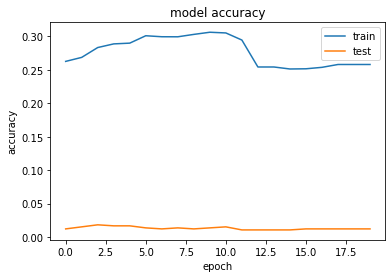

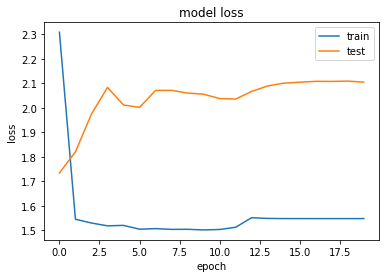

[[ 0  0  0  0  0]
 [36  0  0  0  0]
 [36  0  0  0  0]
 [ 0  0  0  0  0]
 [ 3  0  0  0  0]]


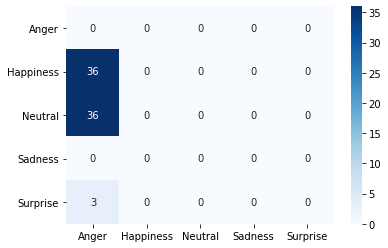

NameError: name 'y_test' is not defined

In [169]:
train_acc = history.history['acc']
test_acc = history.history['val_acc']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot model accuracy
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Plot model loss
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

c_matrix = confusion_matrix(cor, pred, labels=emotion_label)
print(c_matrix)
df = pd.DataFrame(c_matrix, index = emotion_label, columns = emotion_label)
sn.heatmap(df, annot=True, cmap = "Blues", robust=True)
plt.show()



cor = []
for x in y_test:
    print("actual = %s " % emotion_label[x.argmax()])
    cor.append(emotion_label[x.argmax()])


num_of_correct = 0
for x in range(len(prediction)):
    if pred[x] == cor[x]:
        num_of_correct += 1